# Effect of the poles on the time response of first and second order systems
<br> In this demo we will look what the effect is of the position of the poles on the zeros/poles plot, the step response,the impulse response, the settling time and the rise time.
<br> The rise time is the time when the step response crosses 90% of the value of the steady state error for the <b>first time</b>.<br>
The settling time is the time when the step response starts oscillating in a band of 2% of the steady state error.
<br> You are able to choose if you want to see a first order system $\Big($general form $=\large{\frac{k}{s-a}}\Big)$
<br> or a second order system $\Big($general form = $\large{\frac{k}{(s-a)(s-b)}}\Big)$.

In [1]:
%matplotlib inline
from TEMP import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def calculate_steady_state(TF):
    poles=pole(TF)
    if (True in map(lambda x: real(x) >=0,poles)):
        return None
    t,y=step_response(TF)
    return y[len(y)-1]

def calculate_rise_time(y,t,steady_state):
    # Calculate time to reach the steady state for the first time
    if steady_state == None:
        return "not defined"
    for i in range(1,len(y)):
        if y[i-1]<steady_state*0.9 and y[i]>=steady_state*0.9:
            return t[i]
    return "not defined"
def calculate_settling_time(y,t,steady_state):
    # Calculate the settling time
    if steady_state==None:
        return "not defined"
    if y[-1]> (steady_state +0.02*steady_state) or y[-1] < (steady_state - 0.02*steady_state):
        return "not defined"
    else:
        # Run from the back and check when we leave the settling area.
        for i in range(len(y)-1,-1,-1):
            if y[i]> (steady_state + 0.02*steady_state) or y[i] < (steady_state - 0.02*steady_state):
                break
        
        return t[i+1]

## First order system

H(s)= 


  25
------
s + 32

Rise time:  0.0729166666667
Settling time:  0.121527777778


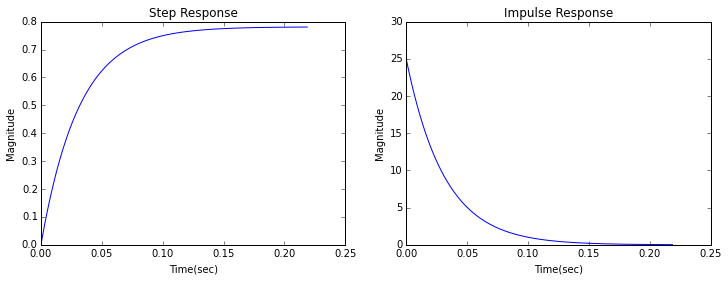

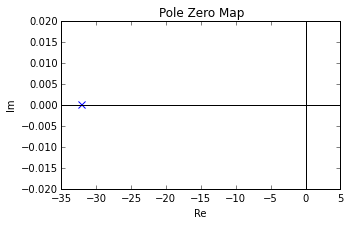

In [3]:
def first_order_system_time_response(k,a):
    """Plots the zero/pole plot, the step response and the impulse response of a first order system."""
    TF = TransferFunction([k],[1,-a])
    print "H(s)= " 
    print 
    print TF
    t_step,y_step = step_response(TF)
    sse= calculate_steady_state(TF)
    t_impulse,y_impulse=impulse_response(TF)
    print "Rise time: ",calculate_rise_time(y_step,t_step,sse)
    print "Settling time: ",calculate_settling_time(y_step,t_step,sse)
    draw(t_step,y_step,t_impulse,y_impulse,TF)
    
    
interact(first_order_system_time_response,k=(0.001,100,1),a=(-100,100,1))

## Second order system

In [2]:
def second_order_system_time_response(k,a,b,im):
    """Plots the zero/pole plot, the step response and the impulse response of a second order system."""
    if a!=b and im !=0:
        print """A real system can't have complex poles that are not each other's conjugates!!!"""
    else:
        TF = TransferFunction([k,],[1,-real(((a+im*1j)+(b-im*1j))),real(a*b-(im*1j)**2)])
        print "H(s)= "
        print 
        print TF
        t_step,y_step=step_response(TF)
        sse= calculate_steady_state(TF)
        print "Rise time: ",calculate_rise_time(y_step,t_step,sse)
        print "Settling time: ",calculate_settling_time(y_step,t_step,sse)
        t_impulse,y_impulse=impulse_response(TF)
        draw(t_step,y_step,t_impulse,y_impulse,TF)
        
        
        
interact(second_order_system_time_response,k=(0.001,100,1),a=(-50,50,1),b=(-50,50,1),im=(-50,50,1))

NameError: name 'interact' is not defined